# Importing necessary libraies 

In [7]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Loading and exploring the data

In [9]:
# Load the dataset (replace 'loan.csv' with your file path)
data = pd.read_csv('loan.csv')

In [11]:
# Display the first few rows to understand its structure
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# Get basic information about columns, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Check for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handle missing values

In [16]:
# Fill missing values for numerical columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [17]:
# Fill missing values for Credit_History with its mode
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [18]:
# Fill missing categorical values with their respective modes
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[column] = data[column].fillna(data[column].mode()[0])

In [19]:
# Verify no missing values remain
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [20]:
# Drop the unnecessary column
data.drop(['Loan_ID'], axis=1, inplace=True)

In [21]:
# Verify remaining columns
print("Columns after dropping unnecessary ones:")
print(data.columns)

Columns after dropping unnecessary ones:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# Encoding Categorical Columns for Machine Learning

To use machine learning algorithms effectively, we need to convert categorical columns into numerical values. Below are the categorical columns that require encoding:

## Categorical Columns to Encode:
1. **Gender**
2. **Married**
3. **Dependents**
4. **Education**
5. **Self_Employed**
6. **Property_Area**
7. **Loan_Status** (Target variable: `Y` or `N`)

## Encoding Methods:
- **Label Encoding**: Assigns a unique integer to each category. Suitable for columns with inherent order.
- **One-Hot Encoding**: Creates binary columns for each category. Ideal for columns with no order.

For the target variable `Loan_Status`, we can apply **Label Encoding**, mapping:
- `Y` → `1`
- `N` → `0`


In [24]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [26]:
# Encode all categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 
                       'Self_Employed', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [28]:
# Verify encoding
print("Data after encoding categorical variables:")
data.head()

Data after encoding categorical variables:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Define features and target

In [29]:
# Define features (X) and target (y)
X = data.drop(['Loan_Status'], axis=1)  # Exclude the target column
y = data['Loan_Status']  # Target column (1 = Approved, 0 = Not Approved)

In [30]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (491, 11)
Testing set size: (123, 11)


# Train the Model

## Model: Random Forest Classifier

We will use the **Random Forest Classifier** for the following reasons:

1. **Versatility**:  
   - It effectively handles both numerical and categorical data.

2. **Robustness**:  
   - It is less prone to overfitting when hyperparameters are tuned properly.

3. **Feature Importance**:  
   - It provides feature importance scores, helping us understand which features contribute the most to the predictions.

## Steps to Train the Model:
1. Split the dataset into **training** and **testing** sets.
2. Initialize the **Random Forest Classifier**.
3. Tune the hyperparameters (e.g., `n_estimators`, `max_depth`) to optimize performance.
4. Train the model on the training set.
5. Evaluate the model on the testing set using metrics like accuracy, precision, recall, and F1-score.


In [33]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [35]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluating the model

In [37]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.76


In [39]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [40]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

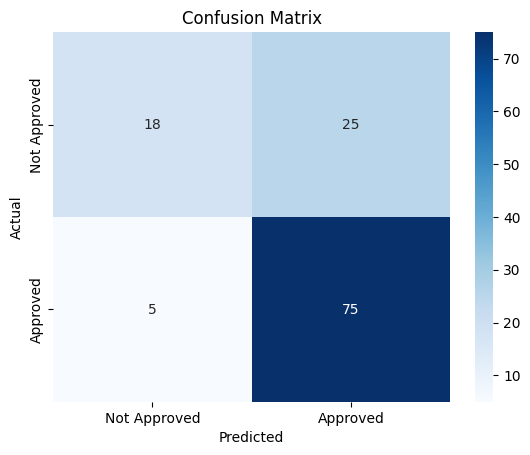

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model

In [45]:
import joblib

In [46]:
# Save the model
joblib.dump(model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [47]:
print("Model saved as 'loan_approval_model.pkl'.")

Model saved as 'loan_approval_model.pkl'.
